In [1]:
%env PYART_QUIET=true

env: PYART_QUIET=true


In [2]:
import pyart

In [3]:
processing_data = pyart.io.read_sigmet("../data/UF/NHB190510231240.RAW97JC")

## Investigate basic data

In [4]:
processing_data.fields.keys()

dict_keys(['total_power', 'reflectivity', 'velocity', 'spectrum_width', 'normalized_coherent_power'])

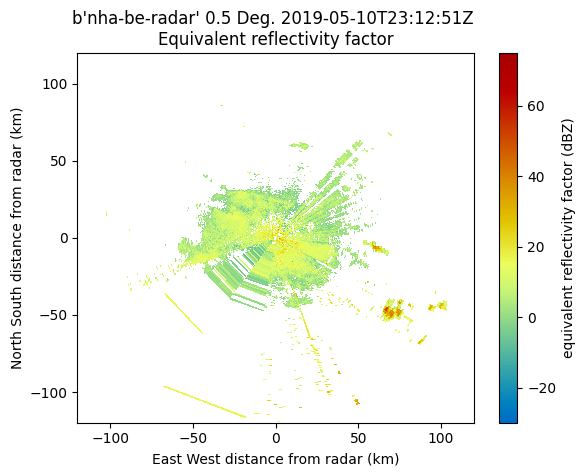

In [5]:
display = pyart.graph.RadarDisplay(processing_data)
display.plot_ppi("reflectivity")

## Convert to Grid coordinate

In [23]:
processed_grid = pyart.map.grid_from_radars(
    processing_data,
    grid_shape=(1, 500, 500),
    grid_limits=((0, 2000), (-50_000, 50_000), (-50_000, 50_000)),
)

/Users/ducth/.pyenv/versions/3.11.7/envs/MF-Airflow/lib/python3.11/site-packages/pyart/graph/gridmapdisplay.py:239: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Mercator.
  warnings.warn(


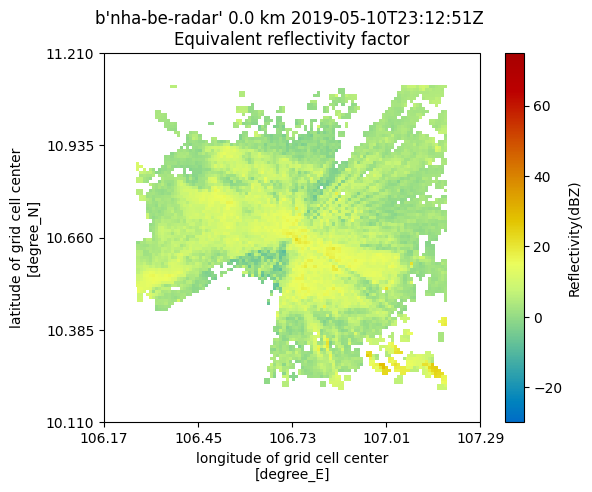

In [22]:
grid_display = pyart.graph.GridMapDisplay(processed_grid)
grid_display.plot_grid('reflectivity', cmap='pyart_HomeyerRainbow')

In [25]:
processed_grid.get_projparams()

{'proj': 'pyart_aeqd',
 'lon_0': 106.72833329066634,
 'lat_0': 10.659610088914633}

In [26]:
processed_grid.get_point_longitude_latitude()

(array([[106.27144226, 106.27327349, 106.27510471, ..., 107.18156187,
         107.18339309, 107.18522432],
        [106.27143964, 106.27327087, 106.27510211, ..., 107.18156447,
         107.18339571, 107.18522694],
        [106.27143701, 106.27326826, 106.2750995 , ..., 107.18156708,
         107.18339833, 107.18522957],
        ...,
        [106.27009603, 106.27193265, 106.27376927, ..., 107.18289731,
         107.18473393, 107.18657055],
        [106.27009324, 106.27192987, 106.2737665 , ..., 107.18290008,
         107.18473671, 107.18657334],
        [106.27009045, 106.27192709, 106.27376373, ..., 107.18290285,
         107.18473949, 107.18657613]]),
 array([[10.20962205, 10.20962467, 10.20962728, ..., 10.20962728,
         10.20962467, 10.20962205],
        [10.21142428, 10.2114269 , 10.2114295 , ..., 10.2114295 ,
         10.2114269 , 10.21142428],
        [10.21322651, 10.21322913, 10.21323173, ..., 10.21323173,
         10.21322913, 10.21322651],
        ...,
        [11.105329

## Todo

- [ ] Return data as numpy

In [34]:
type(processed_grid.fields['reflectivity']['data'])

numpy.ma.core.MaskedArray

In [35]:
processed_grid.fields['reflectivity']['data'].shape

(1, 500, 500)

In [38]:
processed_grid.fields['reflectivity']['data'][:, 10].shape

(1, 500)